In [1]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from tabulate import tabulate
from sklearn.metrics import pairwise_distances
import os

In [5]:
os.chdir('C:\\Users\\yamin\\OneDrive\\Desktop\\Features')

In [6]:
# Read in the text file
# load data from .txt file
with open('11.txt', "r") as infile:
    data = np.loadtxt(infile, delimiter=",")

In [11]:
# Extract the first 1000 rows of data
data = data[:1000, :]

In [12]:
# Split the data into features and labels
features = data[:, 1:]
labels = data[:, 0]

In [13]:
# Set the range of K values to try
k_values = range(3, 6)

# Initialize the KMedoids models
k_medoids_models = [KMedoids(n_clusters=k, init="random", metric="euclidean") for k in k_values]

table_data = []
# Fit the models to the data and get the predicted labels and medoids for each K value
predicted_labels_and_medoids = []
for k_medoids in k_medoids_models:
    k_medoids.fit(features)
    predicted_labels = k_medoids.labels_
    medoids = k_medoids.cluster_centers_
    predicted_labels_and_medoids.append((predicted_labels, medoids))

    # Compute Silhouette Coefficient and Inertia
    silhouette_coef = silhouette_score(features, predicted_labels)
    inertia = sum(np.min(k_medoids.transform(features), axis=1))

    # Compute distances between each point and its assigned medoid
    distances = pairwise_distances(features, medoids)
    
    # Set a threshold value for anomaly detection
    threshold = np.mean(distances) + 2*np.std(distances)
    # Identify anomalies as points that are farther away from their medoid than the threshold value
    anomalies = np.where(distances > threshold)
    anomalies_count = len(anomalies)

    print(f"K = {k_medoids.n_clusters}, Silhouette Coefficient: {silhouette_coef}, Inertia: {inertia}")
    #print(f"Predicted Labels: {predicted_labels}")
    print(f"Medoids: {medoids}")
    print(f"Anomalies: {anomalies_count}")
    print()
    

K = 3, Silhouette Coefficient: -0.5785301086421479, Inertia: 1.2116454300844166e+16
Medoids: [[0.00000e+00 0.00000e+00 1.48000e+02 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 8.00000e+01 0.00000e+00 0.00000e+00 0.00000e+00
  2.00000e+00 0.00000e+00 5.42500e+02 8.82919e+05 1.11000e+02 4.10700e+03
  2.40500e+02 1.73521e+05 3.07000e+02 2.82747e+05 6.00000e+01 1.20000e+03
  7.75000e+00 1.80188e+02 1.50000e+00 7.50000e-01]
 [3.80116e+05 8.04530e+12 1.30108e+05 6.73698e+11 2.26656e+02 1.44612e+05
  3.32987e+05 6.17815e+12 9.34586e+04 3.10725e+11 1.09916e+03 6.96814e+07
  8.50156e+02 4.08252e+07 2.69655e+05 0.00000e+00 2.76465e+05 0.00000e+00
  9.68000e+02 0.00000e+00 2.45913e+05 0.00000e+00 2.55399e+05 0.00000e+00
  4.15000e+02 0.00000e+00 3.84000e+02 0.00000e+00]
 [2.81870e+03 5.82920e+07 3.65149e+03 1.23798e+08 4.39573e+02 1.81337e+05
  1.19250e+03 7.34756e+06 1.86947e+03 2.91525e+07 2.70417e+01 6.61419e+03
  2.91979e+01 8.58789e+03 2.99150e+04 0.00000e+00 2.82850e+04 0.0

### Visualize Clusters

In [15]:
import matplotlib.pyplot as plt

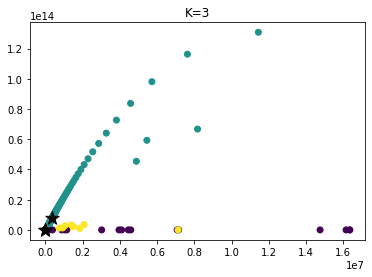

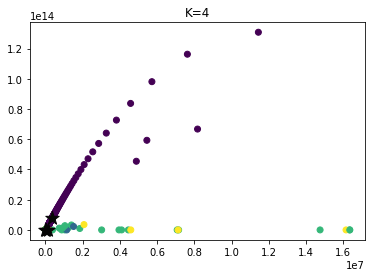

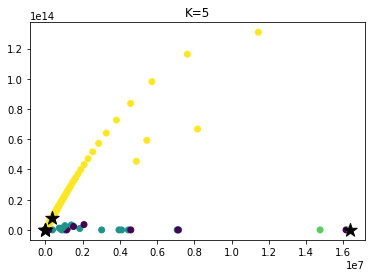

In [16]:
for i, (predicted_labels, medoids) in enumerate(predicted_labels_and_medoids):
    plt.figure(i)
    plt.scatter(features[:, 0], features[:, 1], c=predicted_labels)
    plt.scatter(medoids[:, 0], medoids[:, 1], marker='*', s=200, c='#050505')
    plt.title(f'K={k_values[i]}')
    plt.show()

### Elbow method to determine the optimum number of clusters

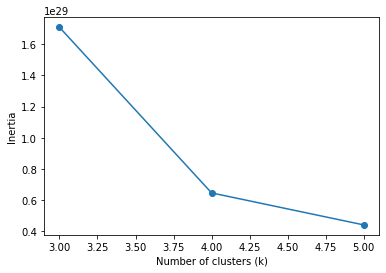

In [17]:
from sklearn.cluster import KMeans
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)
plt.plot(k_values, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()